In [1]:
#Importing Packages
#pip install tensorflow 
import tensorflow_hub as hub
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config;
np_config.enable_numpy_behavior()

2024-06-18 19:19:09.595404: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-18 19:19:09.597463: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-18 19:19:09.642576: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-18 19:19:09.643235: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 19:19:10.637445: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

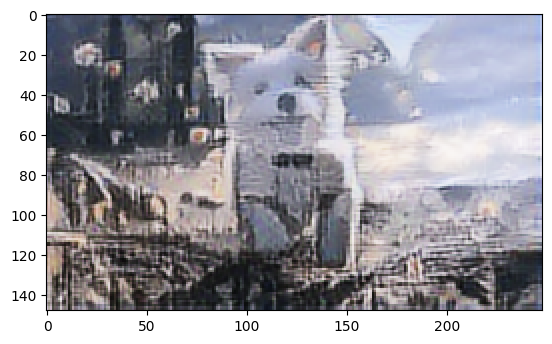

In [2]:
def load_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img/255.
    return img
content_image = load_img('puppy.png')
style_1 = load_img('image.png')
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Apply the style
def apply_style(content_image, style):
    content_image = content_image.reshape(1, content_image.shape[0], content_image.shape[1], content_image.shape[2]).astype('float32')
    content_image = tf.convert_to_tensor(content_image)
    style = cv2.resize(style, (256,256))
    style = style.reshape(1, style.shape[0], style.shape[1], style.shape[2]).astype('float32')
    outputs = model(tf.constant(content_image), tf.constant(style))
    stylized_image = outputs[0]
    return stylized_image
#display the image
img = apply_style(content_image, style_1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img[0])
plt.show()